## References
https://pillow.readthedocs.io/en/latest/index.html
https://pillow.readthedocs.io/en/stable/index.html

In [48]:
from PIL import Image
from IPython.display import display
import numpy as np

In [23]:
a = np.full((1, 1), 300)
print(a.shape)
print(a)

(1, 1)
[[300]]


## Create image

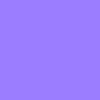

In [31]:
# Create an image from scratch
img_created = Image.new('RGB', (100, 100), (155, 125, 255))
display(img_created)

# Create image from numpy array

## numpy conversion


In [49]:
## PIL to numpy array
img_new = Image.new('RGB', (100, 100), (155, 125, 255))
img_arr = np.array(img_new)
print(img_arr.shape)

(100, 100, 3)


## Read and write image

In [5]:
from PIL import Image
from IPython.display import display
import numpy as np
import cv2


img_file = "./data/obama.jpg"
img_src = Image.open(img_file)  # the image channel is RGB
img_src.save("./data/obama_PIL.jpg")

img_src = np.array(img_src)
cv2.cvtColor(img_src, cv2.COLOR_BGR2RGB, img_src)
cv2.cvtColor(img_src, cv2.COLOR_BGR2RGB, img_src)
img_src = Image.fromarray(img_src)
img_src.save("./data/obama_PIL_RGB.jpg")


img_cv = cv2.imread(img_file)
img_src = Image.fromarray(img_cv)
img_src.save("./data/obama_cv2.jpg")

In [26]:
img_file = "./data/obama.jpg"
img_src = Image.open(img_file)
print(img_src.format, img_src.size, img_src.mode)

value = img_src.getpixel((0, 0)) # get the RGB value
print(value)

## Save image
## From a numpy array to PIL image
im = Image.fromarray(a)
print(type(im), im.size)

## Save image
im.save("ob.jpg")


JPEG (224, 224) RGB
(112, 93, 79)


### Read transparent image

In [28]:
from PIL import Image
import numpy as np


image_path = "./data/22.png"

img = Image.open(image_path)
print(img.size, img.mode, img.format)

img_rgb = img.convert("RGB")
img_rgb.save("rgb.jpg")

img_arr = np.array(img)[..., :3]
img_rgb = Image.fromarray(img_arr)
img_rgb.save("rgb2.jpg")

(137, 137) RGBA PNG


In [14]:
from PIL import Image
import numpy as np
from torchvision import transforms as T


image_path = "./data/gray.png"
img = Image.open(image_path)
print(img.size, img.mode, img.format)

img = Image.open(image_path).convert('L')
img_arr = np.array(img)
print(img_arr.shape, img_arr.min(), img_arr.max())

img = T.ToTensor()(img)
print(img.shape, img.min(), img.max())


(800, 800) L PNG
(800, 800) 0 253
torch.Size([1, 800, 800]) tensor(0.) tensor(0.9922)


In [8]:
from PIL import Image
import numpy as np


image_path = "./data/22.png"

img = Image.open(image_path)
print(img.size, img.mode, img.format)

img_arr = np.array(img)
print(img_arr.shape)
alpha = img_arr[..., -1]
alpha = alpha > 0
alpha = alpha.astype(np.uint8) * 255
print(alpha.shape, alpha.min(), alpha.max(), alpha.dtype, np.unique(alpha))

im = Image.fromarray(alpha).convert("RGB")
img_arr = np.array(im)
print(img_arr.shape)

im.save("./data/22_alpha.png")

(137, 137) RGBA PNG
(137, 137, 4)
(137, 137) 0 255 uint8 [  0 255]
(137, 137, 3) [[[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]]


In [33]:
## Transform image
from torchvision import transforms
import numpy as np


transform = transforms.Compose([
            transforms.Resize(224, antialias=True, interpolation=transforms.InterpolationMode.NEAREST),
            transforms.ToTensor()])

image_path = "./data/22.png"
img = Image.open(image_path)

view_img = transform(img)
print(view_img.shape)

img = transforms.ToPILImage()(view_img[:3, ...])
img.save("./data/22_resize_new.jpg")

# alpha = view_img[-1, ...]
# alpha = alpha > 0
# print(alpha.shape)

# alpha = alpha.numpy().astype(np.uint8) * 255
# print(alpha.shape, alpha.min(), alpha.max(), alpha.dtype, np.unique(alpha))

# im = Image.fromarray(alpha).convert("RGB")
# im.save("./data/22_alpha_new.png")

rgb = view_img[:3, ...].permute(1, 2, 0)
print(rgb.shape, rgb.min(),  rgb.max(), view_img.dtype, type(view_img))
rgb = rgb.numpy().astype(np.uint8) * 255
rgb = Image.fromarray(rgb)
rgb.save("./data/22_resize.jpg")


torch.Size([4, 224, 224])
torch.Size([224, 224, 3]) tensor(0.) tensor(1.) torch.float32 <class 'torch.Tensor'>


## Display images

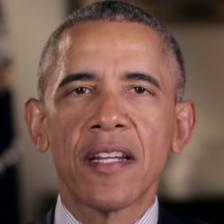

In [64]:
from PIL import Image

img_path = "./data/obama.jpg"
img_src = Image.open(img_path)

display(img_src)

## Crop/Rotate image

(200, 200)


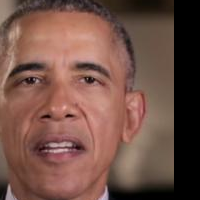

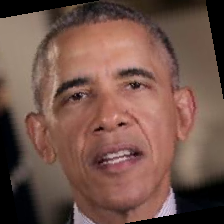

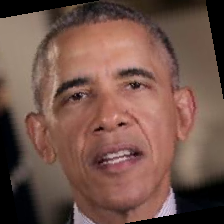

In [71]:
img = img_src.crop((50, 10, 250, 210))
print(img.size)
display(img)

img = img_src.rotate(10.3, resample=0, expand=0)
display(img)

img = img_src.rotate(10.3)
display(img)

## Some operations
https://auth0.com/blog/image-processing-in-python-with-pillow/#Resizing-Images

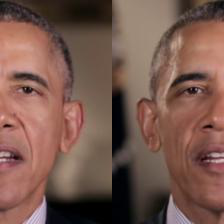

In [17]:
def roll(im, delta):
    """Roll an image sideways."""
    xsize, ysize = im.size

    delta = delta % xsize
    if delta == 0:
        return im

    part1 = im.crop((0, 0, delta, ysize))
    part2 = im.crop((delta, 0, xsize, ysize))
    im.paste(part1, (xsize - delta, 0, xsize, ysize))
    im.paste(part2, (0, 0, xsize - delta, ysize))

    return im

img_roll = roll(img_src, 112)
display(img_roll)

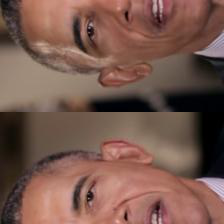

In [19]:
img_rotate = img_src.rotate(90)
display(img_rotate)

## Resize images

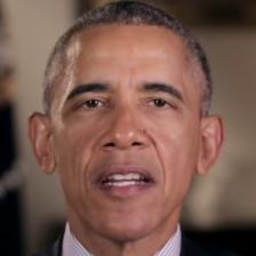

In [32]:
new_size = (256, 256)
img_resized = img_src.resize(new_size)
display(img_resized)

## image augmentation

In [52]:
import numpy as np
from PIL import Image


fH, fW = 256, 704
H, W = 900, 1600

resize = float(fW) / float(W)
resize += np.random.uniform(-0.06, 0.11)
resize_dims = (int(W * resize), int(H * resize))
print(resize_dims)

newW, newH = resize_dims
crop_h = int((1 - np.random.uniform(0.0, 0.0)) *newH) - fH
crop_w = int(np.random.uniform(0, max(0, newW - fW)))
crop = (crop_w, crop_h, crop_w + fW, crop_h + fH)
print(crop)

rotate = np.random.uniform(-5.4, 5.4)
print(rotate)


(852, 479)
(51, 223, 755, 479)
-4.53998736387602
